# Working with Numpy and Pandas
### by [Jason DeBacker](http://jasondebacker.com), August 2019

This Jupyter Notebook demonstrates how to work with Python packages that are heavily used by economists and data scientists, [NumPy](https://numpy.org) and [Pandas](https://pandas.pydata.org) (both of these packages were including with Anaconda's Python distribution).  We'll cover the basics of array operations in Numpy and loading, manipulating, and summarizing data in Pandas.


## NumPy

NumPy is fundamental for data analysis.  It extends Python's built-in datatypes to add multidimensional arrays, NumPy arrays.  These arrays can be of any dimension, but all elements must be of the same data type (e.g., all elements are floating point numbers or they are all booleans, etc.).


In [1]:
# import NumPy
import numpy as np

In [2]:
# define an array
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [3]:
# Indexing -- zero-based!
A[1, 1]

4

In [4]:
# "Slicing"
A[:, 0]

array([1, 3])

In [5]:
# array addition
A + A

array([[2, 4],
       [6, 8]])

In [6]:
# multiplication is element by element
A * A

array([[ 1,  4],
       [ 9, 16]])

In [7]:
# dot product
np.dot(A, A)

array([[ 7, 10],
       [15, 22]])

In [8]:
# Grabbing a diagonal of a matrix
np.diag(A)

array([1, 4])

### NumPy broadcasting

Two arrays will be broadcast together if they are the same size OR, for any two dimensions to compare, one of them is the same size and the other is of length one.  Note that dimensions are compared starting with the *last*.

In [9]:
A

array([[1, 2],
       [3, 4]])

In [10]:
B = np.array([2, 5])
B

array([2, 5])

In [11]:
B.shape

(2,)

In [12]:
A * B

array([[ 2, 10],
       [ 6, 20]])

In [13]:
C = np.array([1, 2, 1])
C

array([1, 2, 1])

In [14]:
A * C

ValueError: operands could not be broadcast together with shapes (2,2) (3,) 

### NumPy special arrays

In [15]:
# array of all ones
np.ones(2)

array([1., 1.])

In [16]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [17]:
# array of all zeros
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [18]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
# arrays like others in size
np.zeros_like(A)

array([[0, 0],
       [0, 0]])

# Reshaping arrays

In [20]:
A

array([[1, 2],
       [3, 4]])

In [21]:
A.shape

(2, 2)

In [22]:
A.reshape((4,1))

array([[1],
       [2],
       [3],
       [4]])

In [23]:
A  # note that A wasn't actually changed we reshaped a "view" of the array

array([[1, 2],
       [3, 4]])

In [24]:
# tiling an array across another dimension
D = np.tile(A.reshape(2, 2, 1), (1, 1, 4))

In [25]:
D

array([[[1, 1, 1, 1],
        [2, 2, 2, 2]],

       [[3, 3, 3, 3],
        [4, 4, 4, 4]]])

In [26]:
D.shape

(2, 2, 4)

## Pandas

The main object in Pandas is the "DataFrame" - a 2-dimesnional object.  You can think of a Pandas DataFrame like a table of data. Although, Pandas does offer advanced indexing, so one can reprsent multidimensional data in a DataFrame.

In [27]:
import pandas as pd

In [28]:
# create a dictionary with some data
data = {'school': ['Texas', 'Texas', 'Texas', 'Texas', 'Texas', 'UGA', 'UGA', 'UGA', 'UGA'],
        'year': [2014, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018],
        'wins': [6, 5, 5, 7, 10, 10, 8, 13, 11]}
data

{'school': ['Texas',
  'Texas',
  'Texas',
  'Texas',
  'Texas',
  'UGA',
  'UGA',
  'UGA',
  'UGA'],
 'year': [2014, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018],
 'wins': [6, 5, 5, 7, 10, 10, 8, 13, 11]}

In [29]:
df = pd.DataFrame(data)

In [30]:
df

,school,year,wins
0,Texas,2014,6
1,Texas,2015,5
2,Texas,2016,5
3,Texas,2017,7
4,Texas,2018,10
5,UGA,2015,10
6,UGA,2016,8
7,UGA,2017,13
8,UGA,2018,11


In [31]:
# Column names
df.columns

Index(['school', 'year', 'wins'], dtype='object')

In [32]:
# to to do the same thing, but return just list of column names
list(df)

['school', 'year', 'wins']

In [33]:
# To reference a particular column
df['wins']

0     6
1     5
2     5
3     7
4    10
5    10
6     8
7    13
8    11
Name: wins, dtype: int64

In [34]:
# column names are case-sensitive...
df['Wins']

KeyError: 'Wins'

In [35]:
# Another way to reference a column - when names have no spaces
df.wins

0     6
1     5
2     5
3     7
4    10
5    10
6     8
7    13
8    11
Name: wins, dtype: int64

In [36]:
# Reference specific cells with the .loc method
df.loc[0]  # this will return the first row

school    Texas
year       2014
wins          6
Name: 0, dtype: object

In [37]:
# Slices
df.loc[1:3]  # this returns the 2nd through 4th rows

,school,year,wins
1,Texas,2015,5
2,Texas,2016,5
3,Texas,2017,7


In [38]:
# To return a specfic cell, we specify the row then column
df.loc[5, 'school']

'UGA'

In [39]:
# Can slice like this too
df.loc[2:7, 'school']

2    Texas
3    Texas
4    Texas
5      UGA
6      UGA
7      UGA
Name: school, dtype: object

In [40]:
# grouping data
df.groupby(['school'])['wins'].sum()

school
Texas    33
UGA      42
Name: wins, dtype: int64

In [41]:
# To do just the last two seasons, 2017 and 2018
df[df['year'] >= 2017].groupby(['school'])['wins'].sum()

school
Texas    17
UGA      24
Name: wins, dtype: int64

In [42]:
# summarizing data
df.describe()

,year,wins
count,9.000000,9.000000
mean,2016.222222,8.333333
std,1.394433,2.828427
min,2014.000000,5.000000
25%,2015.000000,6.000000
50%,2016.000000,8.000000
75%,2017.000000,10.000000
max,2018.000000,13.000000


In [43]:
# creating a new column
df['wins squared'] = df['wins'] ** 2
df

,school,year,wins,wins squared
0,Texas,2014,6,36
1,Texas,2015,5,25
2,Texas,2016,5,25
3,Texas,2017,7,49
4,Texas,2018,10,100
5,UGA,2015,10,100
6,UGA,2016,8,64
7,UGA,2017,13,169
8,UGA,2018,11,121


In [44]:
# to peak at the first two rows of data
df.head(n=2)

,school,year,wins,wins squared
0,Texas,2014,6,36
1,Texas,2015,5,25


In [45]:
# renaming columns
df.rename(columns={"wins": "Wins", "wins squared": "win sq"}, inplace=True)
df

,school,year,Wins,win sq
0,Texas,2014,6,36
1,Texas,2015,5,25
2,Texas,2016,5,25
3,Texas,2017,7,49
4,Texas,2018,10,100
5,UGA,2015,10,100
6,UGA,2016,8,64
7,UGA,2017,13,169
8,UGA,2018,11,121


In [47]:
# changing the index values
# here we'll change from the 0 to 8 to index values that run from 1 to 9
df.set_index([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

,school,year,Wins,win sq
1,Texas,2014,6,36
2,Texas,2015,5,25
3,Texas,2016,5,25
4,Texas,2017,7,49
5,Texas,2018,10,100
6,UGA,2015,10,100
7,UGA,2016,8,64
8,UGA,2017,13,169
9,UGA,2018,11,121


In [50]:
# Reading in data from a datafile (here a csv file)
cricket_data = pd.read_csv('./DataFiles/matches.csv')
cricket_data.head(n=5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [51]:
# See number of wins in 2017
wins_2017 = cricket_data[
    cricket_data['season']==2017][['season', 'winner']].groupby(['winner']).count()
wins_2017

,season
winner,
Delhi Daredevils,6
Gujarat Lions,4
Kings XI Punjab,7
Kolkata Knight Riders,9
Mumbai Indians,12
Rising Pune Supergiant,10
Royal Challengers Bangalore,3
Sunrisers Hyderabad,8


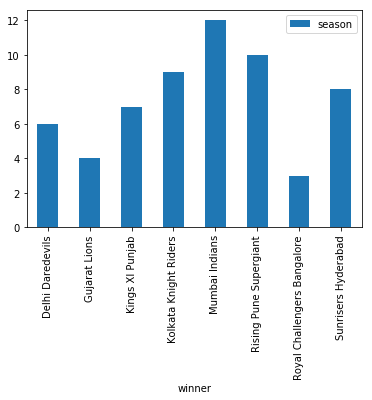

In [53]:
# to put plot in this notebook, use following "magic" command
%matplotlib inline
# Plotting is built into Pandas as method of dataframes
wins_2017.plot.bar(y='season')